In [1]:
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt

In [ ]:
#One sided inverse
#Left-Inverse
A = np.array([[1,4],[2,5],[3,6]])

tA = np.transpose(A) #to make it a square matrix
tAA = tA@A #If A is full rank, tAA is a full rank invertible matrix
tAInv = np.linalg.inv(tAA) 
AInv = tAInv@tAA
L = tAInv@tA
print("A\n", A, "\n", "L\n",L, "\nL@A\n", L@A)

A
 [[1 4]
 [2 5]
 [3 6]] 
 L
 [[-0.94444444 -0.11111111  0.72222222]
 [ 0.44444444  0.11111111 -0.22222222]] 
L@A
 [[ 1.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  1.00000000e+00]]


In [ ]:
# Calculate a full-rank matrix's inverse

def minors(p_M , p_r, p_c):
    retM = np.delete(p_M,p_r,0)
    retM = np.delete(retM,p_c,1)
    
    return(np.linalg.det(retM))

A = np.random.randint(1,20,16).reshape(4,4)
if np.linalg.matrix_rank(A)<A.shape[0]:
    print("Non-invertible matrix")
    exit
# A = np.array([3,0,2,2,0,-2,0,1,1]).reshape(3,3)
D = np.zeros((A.shape[0],A.shape[1]))
C = np.zeros((A.shape[0],A.shape[1]))
G = np.zeros((A.shape[0],A.shape[1]))
g = 0
for r in range(A.shape[0]):
    for c in range(A.shape[1]):
        D[r,c]=minors(A,r,c)
        g = (-1)**(r+c)
        G[r,c]=g
        C[r,c]= D[r,c]*g

print("A\n",A)
invA = np.transpose(C)*(1/np.linalg.det(A))
print("invA\n", invA)
print("A@invA\n", np.round(A@invA))
#Ex 8-5
print("pinvA\n", np.linalg.pinv(A))


A
 [[ 2 18  2 11]
 [ 9  5  9  9]
 [ 4 14 19  5]
 [ 4  2 19  5]]
invA
 [[-0.1037037   0.16378601  0.0984225  -0.16508916]
 [ 0.         -0.          0.08333333 -0.08333333]
 [-0.00740741 -0.02798354  0.01165981  0.05500686]
 [ 0.11111111 -0.02469136 -0.1563786   0.1563786 ]]
A@invA
 [[ 1. -0. -0.  0.]
 [ 0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0. -0. -0.  1.]]
pinvA
 [[-1.03703704e-01  1.63786008e-01  9.84224966e-02 -1.65089163e-01]
 [ 6.93889390e-18  1.38777878e-17  8.33333333e-02 -8.33333333e-02]
 [-7.40740741e-03 -2.79835391e-02  1.16598080e-02  5.50068587e-02]
 [ 1.11111111e-01 -2.46913580e-02 -1.56378601e-01  1.56378601e-01]]


In [ ]:
#Ex 8-1
A = np.array([[1,4,7],[2,5,8],[3,16,19]])
print("A\n", A)
invA = np.linalg.inv(A)
invinvA = np.linalg.inv(invA)
print("invinvA\n",invinvA)

A
 [[ 1  4  7]
 [ 2  5  8]
 [ 3 16 19]]
invinvA
 [[ 1.  4.  7.]
 [ 2.  5.  8.]
 [ 3. 16. 19.]]


In [3]:
#Ex 8-4

A = np.transpose(np.array([[1,4],[12,5],[13,6]]))
print("A\n", A)
tA = np.transpose(A) #to make it a square matrix
AtA = A@tA #If A is full rank, AtA is a full rank invertible matrix
tAInv = np.linalg.inv(AtA) 
AInv = AtA@tAInv
R = tA@tAInv
print("R\n",R ,"\nA@R\n", A@R)
#Ex 8-5
print("pInv")
print(np.linalg.pinv(A))

A
 [[ 1 12 13]
 [ 4  5  6]]
R
 [[-0.12232187  0.27752865]
 [ 0.0533134  -0.03338316]
 [ 0.03712008  0.00946687]] 
A@R
 [[ 1.00000000e+00 -3.33066907e-16]
 [ 1.66533454e-16  1.00000000e+00]]
pInv
[[-0.12232187  0.27752865]
 [ 0.0533134  -0.03338316]
 [ 0.03712008  0.00946687]]


In [11]:
A = np.array([[1,2],[3,4]])
B = np.array([[4,5],[6,7]])

M1 = np.linalg.norm(np.linalg.inv(A@B))
M2 = np.linalg.norm(np.linalg.inv(A) - np.linalg.inv(B))
M3 = np.linalg.norm(np.linalg.inv(B) - np.linalg.inv(A))

print (M1,M2,M3)


15.333786225195709 2.9999999999999907 2.9999999999999907


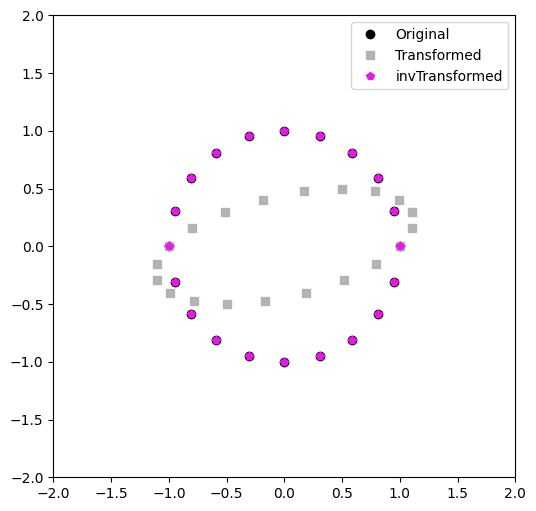

In [ ]:
# Ex 8-8
# Transformation matrix
T = np.array([
              [1,.5],
              [0,.5]
            ])


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints
invTransformedPoints = np.linalg.inv(T)@transformedPoints
origPoints

# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')
plt.plot(invTransformedPoints[0,:],invTransformedPoints[1,:],'p',
         color=[.9,.1,.9],label='invTransformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_07_08.png',dpi=300)
plt.show()

In [99]:
#Ex 8-10

def hilbert(p_rows, p_cols):
    a = np.array(range(p_rows))+1
    b = np.array(range(p_cols))+1
    return 1/(np.add.outer(a,b)-1)

def grand(p_rows, p_cols):
    return np.array(np.random.normal(size=(p_rows,p_cols))).reshape(p_rows,p_cols)

for lp in range(3,16):
    if lp == 3:
        hld = np.zeros(14)
        hlc = np.zeros(14)
    
    h_i = np.linalg.inv(hilbert(lp,lp))@hilbert(lp,lp)
    np_i = np.eye(lp,lp)
    hld[lp-4] = np.linalg.norm(h_i-np_i)
    hlc[lp-4] = np.linalg.cond(hilbert(lp,lp))

for lp in range(3,16):
    if lp == 3:
        gld = np.zeros(14)
        glc = np.zeros(14)
    
    h_i = np.linalg.inv(grand(lp,lp))@grand(lp,lp)
    np_i = np.eye(lp,lp)
    gld[lp-4] = np.linalg.norm(h_i-np_i)
    glc[lp-4] = np.linalg.cond(grand(lp,lp))

px.line(np.log(glc))
# px.line(np.log(hlc))
# px.line(np.log(gld))
# px.line(np.log(hld))

/tmp/ipykernel_4312/4179855633.py:31: RuntimeWarning:

divide by zero encountered in log

